In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install Packages
!pip install h3 --quiet
!pip install matplotlib_scalebar --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00


In [4]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import MinMaxScaler
import h3
#import folium
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# import scipy.stats
# import numpy as np
#from math import sqrt
#import requests

In [5]:
path = '/content/drive/My Drive/Colab/'

# Load data

In [6]:
#OBSERVED FLOWS

OD = pd.read_csv(path + 'OD_level7_nonwork_new.csv')
ODW = pd.read_csv(path + 'OD_level7_work_new.csv')

In [7]:
#GENERATED FLOWS
DG_work = pd.read_csv( path + 'DG_work.csv')
DG_nonwork = pd.read_csv( path + 'DG_nonwork.csv')
SIM_work =  pd.read_csv( path + 'SIM_work.csv')
SIM_nonwork = pd.read_csv( path + 'SIM_nonwork.csv')

# locomizer hexagon grid at level 7
London = gpd.read_file(path + 'grid7.json')

#London borough
LDN_borough = gpd.read_file(path + 'London_borough.json')

In [8]:
#set

#setup the font
tfont = {'fontname':'Liberation Sans Narrow', 'weight':'bold'}
afont = {'fontname':'Liberation Sans Narrow', 'weight':'light'}

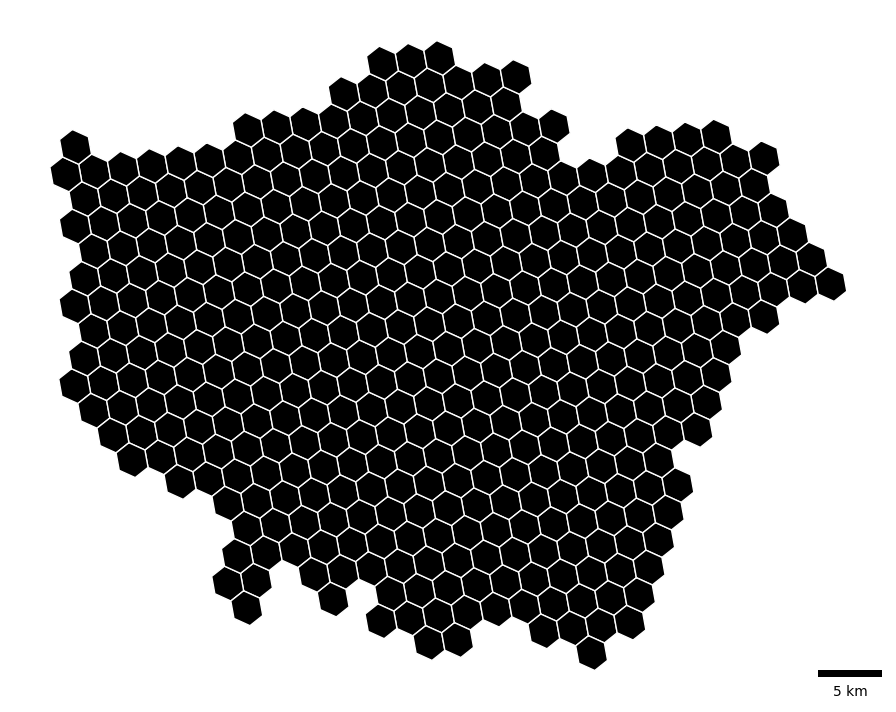

In [9]:
# Transform London to BNG
London.to_crs("EPSG:27700", inplace=True)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9))

# scalebar
divider = make_axes_locatable(ax)
scalebar = ScaleBar(1, location='lower right', scale_loc='bottom', length_fraction=0.1)
ax.add_artist(scalebar)

# Plot the map
London.plot(facecolor="black", edgecolor="white", ax=ax)
plt.axis('off')

# Save the plot
plt.savefig(path + "images/Hexagons_level7.png", bbox_inches='tight')

# **Non-Work**

In [71]:
DG_nonwork = DG_nonwork[DG_nonwork["ORIGIN_CODE"] != DG_nonwork["DESTINATION_CODE"]]
DG_nonwork

,ORIGIN_CODE,DESTINATION_CODE,flows
0,87195dadeffffff,87194ad09ffffff,7
1,87195dadeffffff,87195dac8ffffff,7
2,87195dadeffffff,87194ad53ffffff,4
3,87195dadeffffff,87194e610ffffff,4
4,87195dadeffffff,87195dad5ffffff,4
...,...,...,...
51870,87195da66ffffff,87194e680ffffff,59
51871,87195da66ffffff,87194e61cffffff,76
51872,87195da66ffffff,87194e61affffff,77
51873,87195da66ffffff,87194aca2ffffff,35


In [72]:
OD = OD.copy()
OD = pd.merge(DG_nonwork, OD, on=['ORIGIN_CODE', 'DESTINATION_CODE'], how= 'inner')
OD.drop(columns=['flows'], inplace=True)
OD = OD[OD["ORIGIN_CODE"] != OD["DESTINATION_CODE"]]
OD

,ORIGIN_CODE,DESTINATION_CODE,FLOWS
0,87195dadeffffff,87194ad09ffffff,0.0
1,87195dadeffffff,87195dac8ffffff,0.0
2,87195dadeffffff,87194ad53ffffff,0.0
3,87195dadeffffff,87194e610ffffff,0.0
4,87195dadeffffff,87195dad5ffffff,46.0
...,...,...,...
51745,87195da66ffffff,87194e680ffffff,0.0
51746,87195da66ffffff,87194e61cffffff,0.0
51747,87195da66ffffff,87194e61affffff,23.0
51748,87195da66ffffff,87194aca2ffffff,0.0


In [73]:
SIM_nonwork

,ORIGIN_CODE,DESTINATION_CODE,flows
0,87194ac00ffffff,87194ac01ffffff,1464.0
1,87194ac00ffffff,87194ac02ffffff,1464.0
2,87194ac00ffffff,87194ac03ffffff,1418.0
3,87194ac00ffffff,87194ac04ffffff,2779.0
4,87194ac00ffffff,87194ac05ffffff,1915.0
...,...,...,...
51745,87195db69ffffff,87195db5affffff,3.0
51746,87195db69ffffff,87195db5bffffff,12.0
51747,87195db69ffffff,87195db5cffffff,4.0
51748,87195db69ffffff,87195db5dffffff,10.0


In [74]:
# OBSERVED
OBS = OD.copy()
OBS.drop(columns=['ORIGIN_CODE'], inplace=True)
OBS = OBS.groupby('DESTINATION_CODE')['FLOWS'].sum().reset_index()
OBS = OBS.rename(columns={'DESTINATION_CODE': '_index',
                                     'FLOWS': 'OBS'})

# SIM
SIM = SIM_nonwork.copy()
SIM.drop(columns=['ORIGIN_CODE'], inplace=True)
SIM = SIM.groupby('DESTINATION_CODE')['flows'].sum().reset_index()
SIM= SIM.rename(columns={'DESTINATION_CODE': '_index',
                                     'flows': 'SIM'})

# DG
DG = DG_nonwork.copy()
DG.drop(columns=['ORIGIN_CODE'], inplace=True)
DG = DG.groupby('DESTINATION_CODE')['flows'].sum().reset_index()
DG= DG.rename(columns={'DESTINATION_CODE': '_index',
                                     'flows': 'DG'})

#Change to Integer
OBS['OBS'] = OBS['OBS'].astype(int)
SIM['SIM'] = SIM['SIM'].astype(int)
DG['DG'] = DG['DG'].astype(int)

In [75]:
# Merge the dataframes based on the index ['ORIGIN_CODE', 'DESTINATION_CODE']
Nonwork = pd.merge(OBS, SIM, on= '_index', how= 'left')
Nonwork = pd.merge(Nonwork, DG, on= '_index', how= 'left')
Nonwork

,_index,OBS,SIM,DG
0,87194ac00ffffff,10258,8653,5851
1,87194ac01ffffff,6601,8773,3667
2,87194ac02ffffff,1288,3804,2987
3,87194ac03ffffff,4738,7211,3014
4,87194ac04ffffff,14329,10526,5985
...,...,...,...,...
410,87195db5bffffff,1909,3722,4854
411,87195db5cffffff,345,243,2118
412,87195db5dffffff,851,891,2324
413,87195db69ffffff,989,233,2125


<Axes: xlabel='DG'>

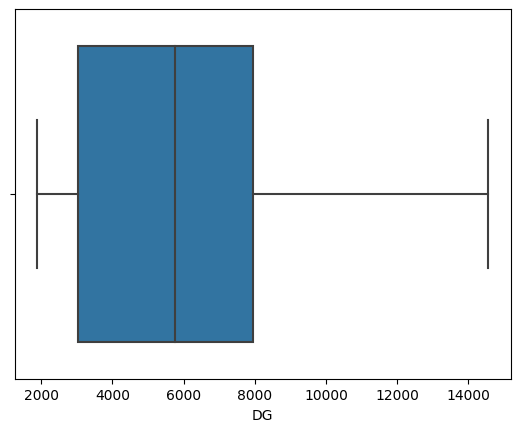

In [76]:
sns.boxplot(x=Nonwork["DG"])

<Axes: xlabel='OBS'>

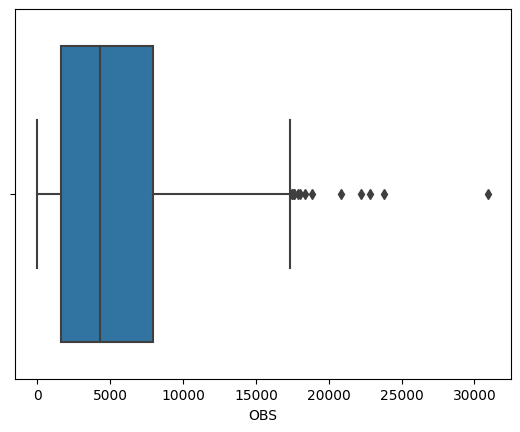

In [77]:
sns.boxplot(x=Nonwork["OBS"])

<Axes: xlabel='SIM'>

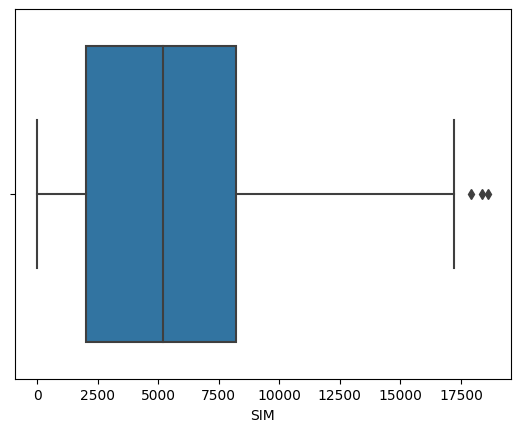

In [78]:
sns.boxplot(x=Nonwork["SIM"])

In [79]:
# Create a MinMaxScaler
mms = MinMaxScaler()

# Columns to standardize
columns_to_standardize = ['OBS', 'SIM', 'DG']

# Create a copy of the DataFrame
df_standardised = Nonwork.copy()

# Standardize the specified columns
df_standardised[columns_to_standardize] = mms.fit_transform(df_standardised[columns_to_standardize])

# Display the standardized DataFrame
df_standardised

,_index,OBS,SIM,DG
0,87194ac00ffffff,0.331341,0.464096,0.312490
1,87194ac01ffffff,0.213217,0.470541,0.140060
2,87194ac02ffffff,0.041603,0.203663,0.086373
3,87194ac03ffffff,0.153041,0.386648,0.088505
4,87194ac04ffffff,0.462838,0.564692,0.323070
...,...,...,...,...
410,87195db5bffffff,0.061662,0.199259,0.233775
411,87195db5cffffff,0.011144,0.012407,0.017764
412,87195db5dffffff,0.027488,0.047210,0.034028
413,87195db69ffffff,0.031945,0.011870,0.018317


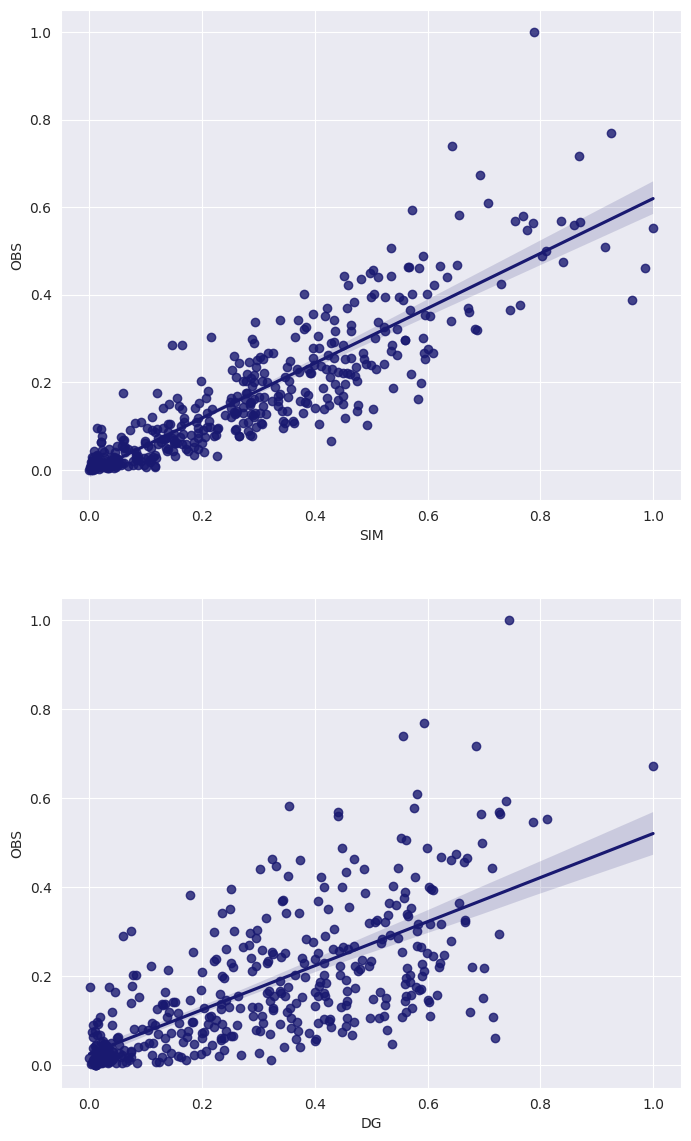

In [132]:
f = plt.figure(figsize=(8, 14))
gs = f.add_gridspec(2, 1)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.regplot(x="SIM", y="OBS", data=df_standardised, color='midnightblue')

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 0])
    sns.regplot(x="DG", y="OBS", data=df_standardised, color='midnightblue')
plt.savefig(path + "images/Non_work_regression.png", bbox_inches = 'tight')

In [81]:
# List of column names for which you want to calculate statistics
columns_to_analyze = ['OBS', 'SIM', 'DG']

# Create an empty DataFrame to store the statistics
statistics_df = pd.DataFrame(columns=['N', 'mean', 'minimum', 'maximum', 'std_deviation', 'variance'])

# Calculate statistics for each column and append to statistics_df
for column_name in columns_to_analyze:
    statistics = {
        'N': Nonwork[column_name].count(),
        'mean': Nonwork[column_name].mean(),
        'minimum': Nonwork[column_name].min(),
        'maximum': Nonwork[column_name].max(),
        'std_deviation': Nonwork[column_name].std(),
        'variance': Nonwork[column_name].var()
    }
    statistics_df = statistics_df.append(pd.DataFrame(statistics, index=[column_name]))

# Reset the index of the resulting DataFrame
statistics_df.reset_index(inplace=True)
statistics_df.rename(columns={'index': 'Column'}, inplace=True)
statistics_df

<ipython-input-81-1e4a313e604b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(pd.DataFrame(statistics, index=[column_name]))
<ipython-input-81-1e4a313e604b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(pd.DataFrame(statistics, index=[column_name]))
<ipython-input-81-1e4a313e604b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(pd.DataFrame(statistics, index=[column_name]))


,Column,N,mean,minimum,maximum,std_deviation,variance
0,OBS,415,5495.612048,0,30959,4902.632980,2.403581e+07
1,SIM,415,5492.250602,12,18631,4117.390081,1.695290e+07
2,DG,415,5769.226506,1893,14559,2775.271479,7.702132e+06


In [83]:
# Merge the dataframes based on the index ['ORIGIN_CODE', 'DESTINATION_CODE']
LDN_final = pd.merge(London, df_standardised, on= '_index', how= 'left')

In [84]:
LDN_final

,_index,geometry,OBS,SIM,DG
0,87195da6dffffff,"POLYGON ((533244.756 188616.370, 532249.060 18...",0.301625,0.591331,0.581636
1,87195d364ffffff,"POLYGON ((508582.379 179953.595, 507582.599 17...",0.060919,0.155701,0.239381
2,87194e6c1ffffff,"POLYGON ((552585.636 176078.867, 551592.306 17...",0.020802,0.030453,0.157429
3,87194e692ffffff,"POLYGON ((532508.265 192676.567, 531512.635 19...",0.228819,0.252430,0.589926
4,87194ada6ffffff,"POLYGON ((522036.690 181295.751, 521038.989 18...",0.111438,0.344111,0.604295
...,...,...,...,...,...
410,87194e616ffffff,"POLYGON ((548895.695 196365.305, 547902.698 19...",0.000000,0.006391,0.012001
411,87194ac2dffffff,"POLYGON ((538403.739 160166.970, 537407.586 15...",0.002972,0.016972,0.003158
412,87194e6a5ffffff,"POLYGON ((546663.674 196144.293, 545670.330 19...",0.005943,0.019604,0.009711
413,87194ac12ffffff,"POLYGON ((521986.454 162651.785, 520987.942 16...",0.046804,0.034373,0.011369


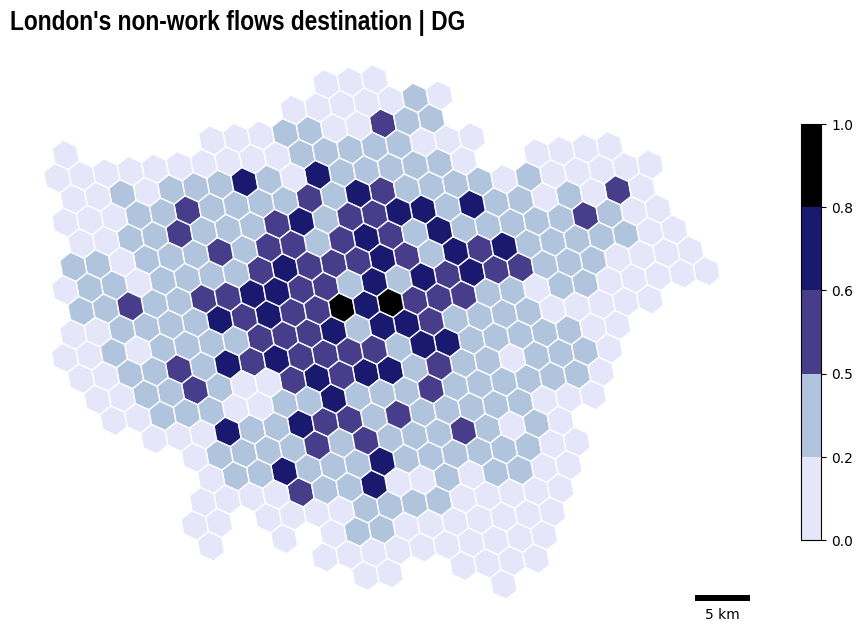

In [125]:
#transform london to BNG
LDN_final.to_crs("EPSG:27700", inplace = True)

# plot
fig, ax = plt.subplots(1,1, figsize=(12,9))

# scalebar
divider = make_axes_locatable(ax)
scalebar = ScaleBar(1, location='lower right', scale_loc='bottom', length_fraction=0.1)
ax.add_artist(scalebar)

# create discrete colormap
cmap = colors.ListedColormap(['lavender','lightsteelblue','darkslateblue','midnightblue', 'Black'])
bounds = [0.0,0.2,0.5,0.6,0.8,1.0]
norm = colors.BoundaryNorm(bounds, cmap.N)

#We can check that this has occured by plotting the results
LDN_final.plot(ax=ax, column='DG', cmap=cmap, norm=norm, legend=True,edgecolor='white',legend_kwds={'shrink': 0.6})

plt.axis('off')
plt.title("London's non-work flows destination | DG", loc='left', size=20,**tfont)
plt.savefig(path + "images/Hex_nonwork_DG.png", bbox_inches = 'tight')

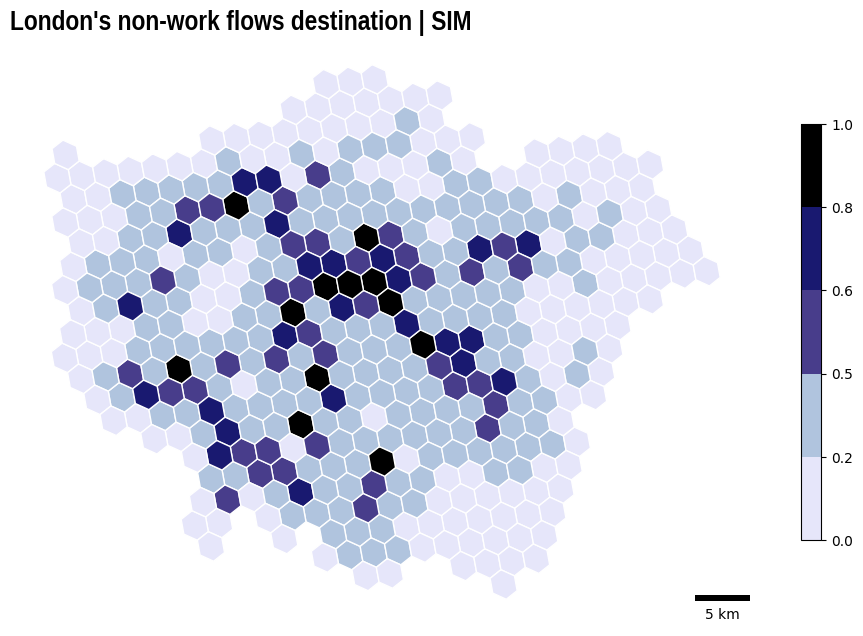

In [126]:
#transform london to BNG
LDN_final.to_crs("EPSG:27700", inplace = True)

# plot
fig, ax = plt.subplots(1,1, figsize=(12,9))

# scalebar
divider = make_axes_locatable(ax)
scalebar = ScaleBar(1, location='lower right', scale_loc='bottom', length_fraction=0.1)
ax.add_artist(scalebar)

# create discrete colormap
cmap = colors.ListedColormap(['lavender','lightsteelblue','darkslateblue','midnightblue', 'Black'])
bounds = [0.0,0.2,0.5,0.6,0.8,1.0]
norm = colors.BoundaryNorm(bounds, cmap.N)

#We can check that this has occured by plotting the results
LDN_final.plot(ax=ax, column='SIM', cmap=cmap, norm=norm, legend=True,edgecolor='white',legend_kwds={'shrink': 0.6})

plt.axis('off')
plt.title("London's non-work flows destination | SIM", loc='left', size=20,**tfont)
plt.savefig(path + "images/Hex_nonwork_SIM.png", bbox_inches = 'tight')

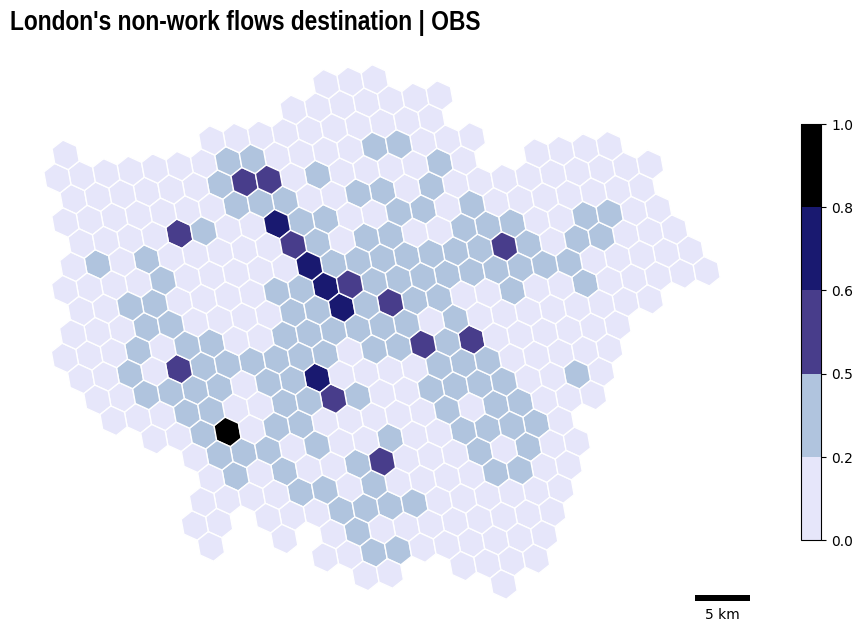

In [127]:
#transform london to BNG
LDN_final.to_crs("EPSG:27700", inplace = True)

# plot
fig, ax = plt.subplots(1,1, figsize=(12,9))

# scalebar
divider = make_axes_locatable(ax)
scalebar = ScaleBar(1, location='lower right', scale_loc='bottom', length_fraction=0.1)
ax.add_artist(scalebar)

# create discrete colormap
cmap = colors.ListedColormap(['lavender','lightsteelblue','darkslateblue','midnightblue', 'Black'])
bounds = [0.0,0.2,0.5,0.6,0.8,1.0]
norm = colors.BoundaryNorm(bounds, cmap.N)

#We can check that this has occured by plotting the results
LDN_final.plot(ax=ax, column='OBS', cmap=cmap, norm=norm, legend=True,edgecolor='white',legend_kwds={'shrink': 0.6})

plt.axis('off')
plt.title("London's non-work flows destination | OBS", loc='left', size=20,**tfont)
plt.savefig(path + "images/Hex_nonwork_OBS.png", bbox_inches = 'tight')

# **Work**

In [135]:
DG_work = DG_work[DG_work["ORIGIN_CODE"] != DG_work["DESTINATION_CODE"]]
DG_work

,ORIGIN_CODE,DESTINATION_CODE,flows
0,87195d366ffffff,87194aca5ffffff,1
1,87195d366ffffff,87195dacbffffff,3
2,87195d366ffffff,87194ada4ffffff,9
3,87195d366ffffff,87194ad26ffffff,8
4,87195d366ffffff,87195d344ffffff,1
...,...,...,...
51870,87194e685ffffff,87194ada8ffffff,13
51871,87194e685ffffff,87194ad91ffffff,12
51872,87194e685ffffff,87194ad81ffffff,4
51873,87194e685ffffff,87194ac28ffffff,2


In [136]:
DG_work

,ORIGIN_CODE,DESTINATION_CODE,flows
0,87195d366ffffff,87194aca5ffffff,1
1,87195d366ffffff,87195dacbffffff,3
2,87195d366ffffff,87194ada4ffffff,9
3,87195d366ffffff,87194ad26ffffff,8
4,87195d366ffffff,87195d344ffffff,1
...,...,...,...
51870,87194e685ffffff,87194ada8ffffff,13
51871,87194e685ffffff,87194ad91ffffff,12
51872,87194e685ffffff,87194ad81ffffff,4
51873,87194e685ffffff,87194ac28ffffff,2


In [137]:
ODW = ODW.copy()
ODW = pd.merge(DG_work, ODW, on=['ORIGIN_CODE', 'DESTINATION_CODE'], how= 'inner')
ODW.drop(columns=['flows'], inplace=True)
ODW = ODW[ODW["ORIGIN_CODE"] != ODW["DESTINATION_CODE"]]
ODW

,ORIGIN_CODE,DESTINATION_CODE,FLOWS
0,87195d366ffffff,87194aca5ffffff,0.0
1,87195d366ffffff,87195dacbffffff,0.0
2,87195d366ffffff,87194ada4ffffff,0.0
3,87195d366ffffff,87194ad26ffffff,0.0
4,87195d366ffffff,87195d344ffffff,0.0
...,...,...,...
51745,87194e685ffffff,87194ada8ffffff,0.0
51746,87194e685ffffff,87194ad91ffffff,0.0
51747,87194e685ffffff,87194ad81ffffff,0.0
51748,87194e685ffffff,87194ac28ffffff,0.0


In [138]:
SIM_work

,ORIGIN_CODE,DESTINATION_CODE,flows
0,87194ac05ffffff,87194ac00ffffff,89.0
1,87194ac05ffffff,87194ac01ffffff,45.0
2,87194ac05ffffff,87194ac02ffffff,10.0
3,87194ac05ffffff,87194ac03ffffff,12.0
4,87194ac05ffffff,87194ac04ffffff,79.0
...,...,...,...
51745,87195daf5ffffff,87195db5bffffff,1.0
51746,87195daf5ffffff,87195db5cffffff,0.0
51747,87195daf5ffffff,87195db5dffffff,0.0
51748,87195daf5ffffff,87195db69ffffff,0.0


In [139]:
# OBSERVED
OBS = ODW.copy()
OBS.drop(columns=['ORIGIN_CODE'], inplace=True)
OBS = OBS.groupby('DESTINATION_CODE')['FLOWS'].sum().reset_index()
OBS = OBS.rename(columns={'DESTINATION_CODE': '_index',
                                     'FLOWS': 'OBS'})

# SIM
SIM = SIM_work.copy()
SIM.drop(columns=['ORIGIN_CODE'], inplace=True)
SIM = SIM.groupby('DESTINATION_CODE')['flows'].sum().reset_index()
SIM= SIM.rename(columns={'DESTINATION_CODE': '_index',
                                     'flows': 'SIM'})

# DG
DG = DG_work.copy()
DG.drop(columns=['ORIGIN_CODE'], inplace=True)
DG = DG.groupby('DESTINATION_CODE')['flows'].sum().reset_index()
DG= DG.rename(columns={'DESTINATION_CODE': '_index',
                                     'flows': 'DG'})

#Change to Integer
OBS['OBS'] = OBS['OBS'].astype(int)
SIM['SIM'] = SIM['SIM'].astype(int)
DG['DG'] = DG['DG'].astype(int)

In [140]:
# Merge the dataframes based on the index ['ORIGIN_CODE', 'DESTINATION_CODE']
Work = pd.merge(OBS, SIM, on= '_index', how= 'left')
Work = pd.merge(Work, DG, on= '_index', how= 'left')
Work

,_index,OBS,SIM,DG
0,87194ac00ffffff,505,486,710
1,87194ac01ffffff,147,201,354
2,87194ac02ffffff,105,174,279
3,87194ac03ffffff,42,114,199
4,87194ac04ffffff,441,569,654
...,...,...,...,...
410,87195db5bffffff,441,387,594
411,87195db5cffffff,21,3,110
412,87195db5dffffff,42,22,137
413,87195db69ffffff,232,26,124


<Axes: xlabel='DG'>

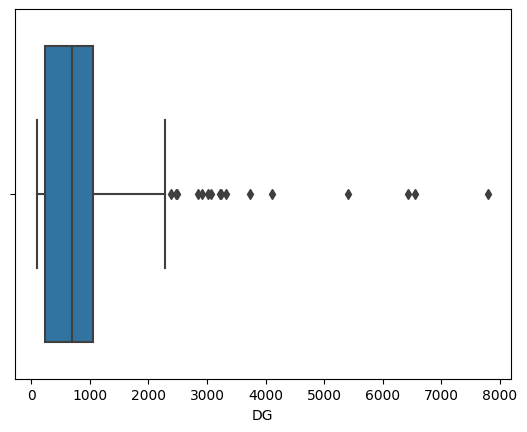

In [141]:
sns.boxplot(x=Work["DG"])

<Axes: xlabel='OBS'>

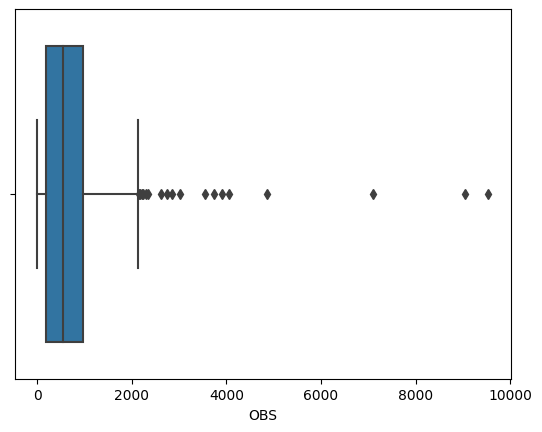

In [142]:
sns.boxplot(x=Work["OBS"])

<Axes: xlabel='SIM'>

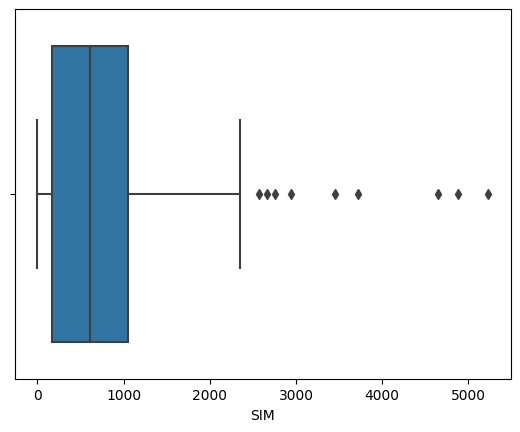

In [143]:
sns.boxplot(x=Work["SIM"])

In [144]:
# Create a MinMaxScaler
mms = MinMaxScaler()

# Columns to standardize
columns_to_standardize = ['OBS', 'SIM', 'DG']

# Create a copy of the DataFrame
df_standardised = Work.copy()

# Standardize the specified columns
df_standardised[columns_to_standardize] = mms.fit_transform(df_standardised[columns_to_standardize])

# Display the standardized DataFrame
df_standardised

,_index,OBS,SIM,DG
0,87194ac00ffffff,0.052941,0.092925,0.078831
1,87194ac01ffffff,0.015410,0.038432,0.032597
2,87194ac02ffffff,0.011007,0.033270,0.022857
3,87194ac03ffffff,0.004403,0.021797,0.012468
4,87194ac04ffffff,0.046231,0.108795,0.071558
...,...,...,...,...
410,87195db5bffffff,0.046231,0.073996,0.063766
411,87195db5cffffff,0.002201,0.000574,0.000909
412,87195db5dffffff,0.004403,0.004207,0.004416
413,87195db69ffffff,0.024321,0.004971,0.002727


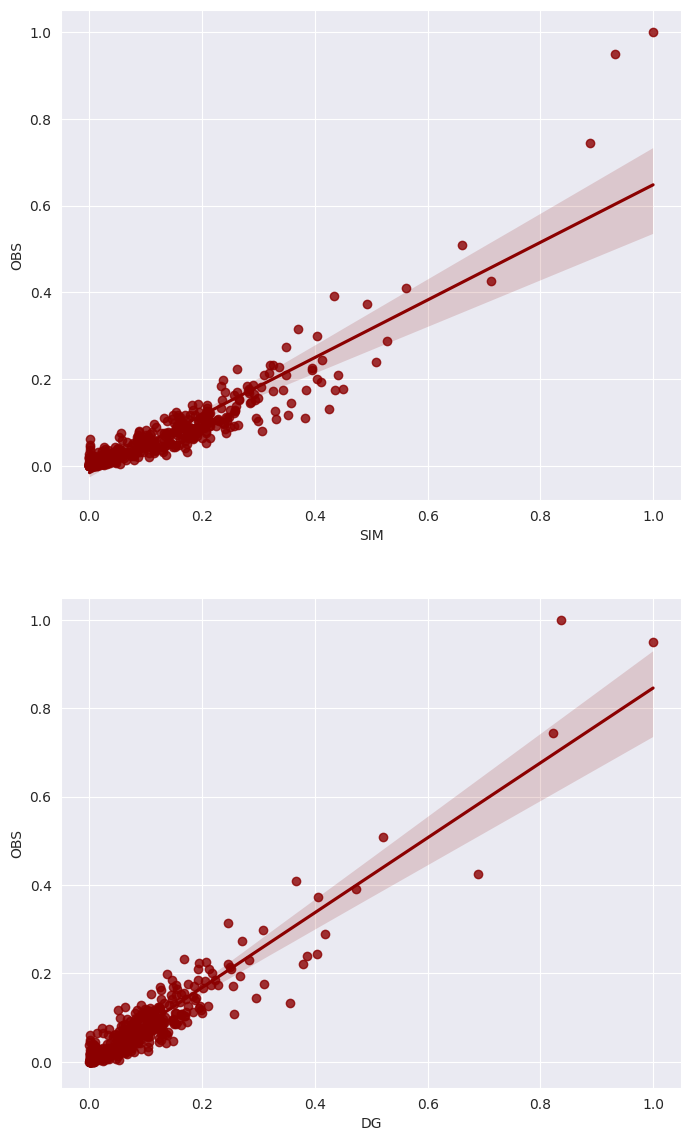

In [145]:
f = plt.figure(figsize=(8, 14))
gs = f.add_gridspec(2, 1)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.regplot(x="SIM", y="OBS", data=df_standardised, color='darkred')

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 0])
    sns.regplot(x="DG", y="OBS", data=df_standardised, color='darkred')
plt.savefig(path + "images/Work_regression.png", bbox_inches = 'tight')

In [146]:
# List of column names for which you want to calculate statistics
columns_to_analyze = ['OBS', 'SIM', 'DG']

# Create an empty DataFrame to store the statistics
statistics_df = pd.DataFrame(columns=['N', 'mean', 'minimum', 'maximum', 'std_deviation', 'variance'])

# Calculate statistics for each column and append to statistics_df
for column_name in columns_to_analyze:
    statistics = {
        'N': Work[column_name].count(),
        'mean': Work[column_name].mean(),
        'minimum': Work[column_name].min(),
        'maximum': Work[column_name].max(),
        'std_deviation': Work[column_name].std(),
        'variance': Work[column_name].var()
    }
    statistics_df = statistics_df.append(pd.DataFrame(statistics, index=[column_name]))

# Reset the index of the resulting DataFrame
statistics_df.reset_index(inplace=True)
statistics_df.rename(columns={'index': 'Column'}, inplace=True)
statistics_df

<ipython-input-146-2e26523cb9c6>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(pd.DataFrame(statistics, index=[column_name]))
<ipython-input-146-2e26523cb9c6>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(pd.DataFrame(statistics, index=[column_name]))
<ipython-input-146-2e26523cb9c6>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(pd.DataFrame(statistics, index=[column_name]))


,Column,N,mean,minimum,maximum,std_deviation,variance
0,OBS,415,736.853012,0,9539,955.380408,912751.724719
1,SIM,415,733.077108,0,5230,720.604834,519271.327373
2,DG,415,817.645783,103,7803,852.875173,727396.060218


In [147]:
# Merge the dataframes based on the index ['ORIGIN_CODE', 'DESTINATION_CODE']
LDN_final = pd.merge(London, df_standardised, on= '_index', how= 'left')

In [148]:
LDN_final

,_index,geometry,OBS,SIM,DG
0,87195da6dffffff,"POLYGON ((533244.756 188616.370, 532249.060 18...",0.110074,0.381644,0.198961
1,87195d364ffffff,"POLYGON ((508582.379 179953.595, 507582.599 17...",0.061642,0.105927,0.066104
2,87194e6c1ffffff,"POLYGON ((552585.636 176078.867, 551592.306 17...",0.074851,0.056405,0.034805
3,87194e692ffffff,"POLYGON ((532508.265 192676.567, 531512.635 19...",0.169724,0.261759,0.125844
4,87194ada6ffffff,"POLYGON ((522036.690 181295.751, 521038.989 18...",0.121082,0.256405,0.193636
...,...,...,...,...,...
410,87194e616ffffff,"POLYGON ((548895.695 196365.305, 547902.698 19...",0.000000,0.000000,0.000909
411,87194ac2dffffff,"POLYGON ((538403.739 160166.970, 537407.586 15...",0.000000,0.000000,0.000779
412,87194e6a5ffffff,"POLYGON ((546663.674 196144.293, 545670.330 19...",0.002201,0.000000,0.000909
413,87194ac12ffffff,"POLYGON ((521986.454 162651.785, 520987.942 16...",0.026418,0.000000,0.001429


In [149]:
LDN_final

,_index,geometry,OBS,SIM,DG
0,87195da6dffffff,"POLYGON ((533244.756 188616.370, 532249.060 18...",0.110074,0.381644,0.198961
1,87195d364ffffff,"POLYGON ((508582.379 179953.595, 507582.599 17...",0.061642,0.105927,0.066104
2,87194e6c1ffffff,"POLYGON ((552585.636 176078.867, 551592.306 17...",0.074851,0.056405,0.034805
3,87194e692ffffff,"POLYGON ((532508.265 192676.567, 531512.635 19...",0.169724,0.261759,0.125844
4,87194ada6ffffff,"POLYGON ((522036.690 181295.751, 521038.989 18...",0.121082,0.256405,0.193636
...,...,...,...,...,...
410,87194e616ffffff,"POLYGON ((548895.695 196365.305, 547902.698 19...",0.000000,0.000000,0.000909
411,87194ac2dffffff,"POLYGON ((538403.739 160166.970, 537407.586 15...",0.000000,0.000000,0.000779
412,87194e6a5ffffff,"POLYGON ((546663.674 196144.293, 545670.330 19...",0.002201,0.000000,0.000909
413,87194ac12ffffff,"POLYGON ((521986.454 162651.785, 520987.942 16...",0.026418,0.000000,0.001429


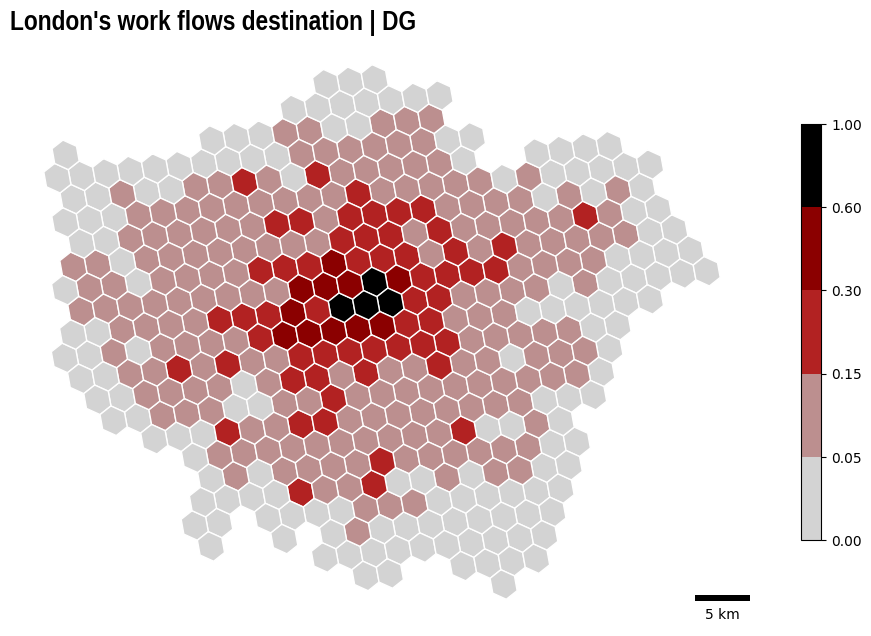

In [150]:
#transform london to BNG
LDN_final.to_crs("EPSG:27700", inplace = True)

# plot
fig, ax = plt.subplots(1,1, figsize=(12,9))

# scalebar
divider = make_axes_locatable(ax)
scalebar = ScaleBar(1, location='lower right', scale_loc='bottom', length_fraction=0.1)
ax.add_artist(scalebar)

# create discrete colormap
cmap = colors.ListedColormap(['lightgrey', 'rosybrown', 'firebrick', 'darkred', 'black'])
bounds = [0.0,0.05,0.15,0.3,0.6,1.0]
norm = colors.BoundaryNorm(bounds, cmap.N)

#We can check that this has occured by plotting the results
LDN_final.plot(ax=ax, column='DG', norm=norm, cmap=cmap, legend=True,edgecolor='white',legend_kwds={'shrink': 0.6})

plt.axis('off')
plt.title("London's work flows destination | DG", loc='left', size=20,**tfont)
plt.savefig(path + "images/Hex_work_DG.png", bbox_inches = 'tight')

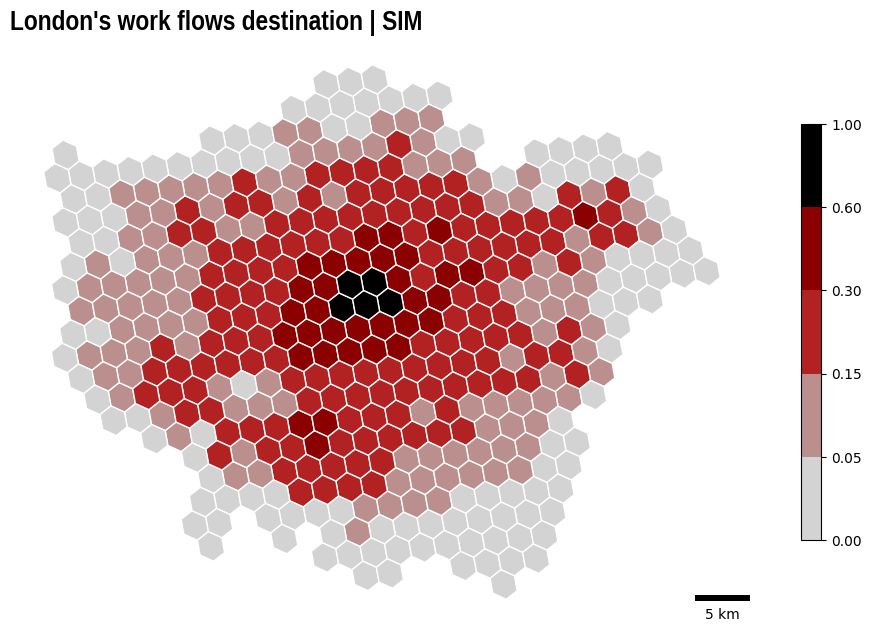

In [151]:
#transform london to BNG
LDN_final.to_crs("EPSG:27700", inplace = True)

# plot
fig, ax = plt.subplots(1,1, figsize=(12,9))

# scalebar
divider = make_axes_locatable(ax)
scalebar = ScaleBar(1, location='lower right', scale_loc='bottom', length_fraction=0.1)
ax.add_artist(scalebar)

# create discrete colormap
cmap = colors.ListedColormap(['lightgrey', 'rosybrown', 'firebrick', 'darkred', 'black'])
bounds = [0.0,0.05,0.15,0.3,0.6,1.0]
norm = colors.BoundaryNorm(bounds, cmap.N)

#We can check that this has occured by plotting the results
LDN_final.plot(ax=ax, column='SIM', cmap=cmap, norm=norm, legend=True,edgecolor='white',legend_kwds={'shrink': 0.6})

plt.axis('off')
plt.title("London's work flows destination | SIM", loc='left', size=20,**tfont)
plt.savefig(path + "images/Hex_work_SIM.png", bbox_inches = 'tight')

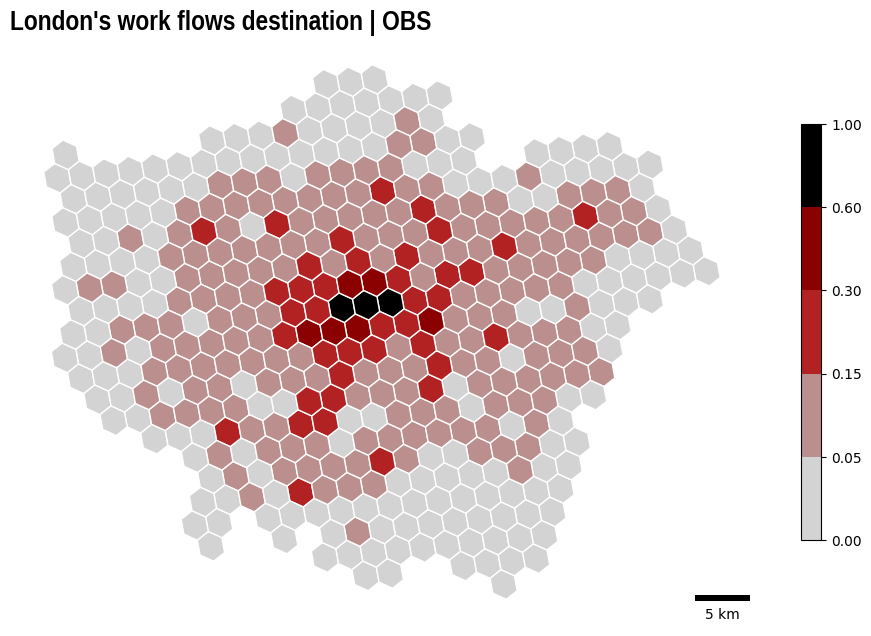

In [152]:
#transform london to BNG
LDN_final.to_crs("EPSG:27700", inplace = True)

# plot
fig, ax = plt.subplots(1,1, figsize=(12,9))

# scalebar
divider = make_axes_locatable(ax)
scalebar = ScaleBar(1, location='lower right', scale_loc='bottom', length_fraction=0.1)
ax.add_artist(scalebar)

# create discrete colormap
cmap = colors.ListedColormap(['lightgrey', 'rosybrown', 'firebrick', 'darkred', 'black'])
bounds = [0.0,0.05,0.15,0.3,0.6,1.0]
norm = colors.BoundaryNorm(bounds, cmap.N)

#We can check that this has occured by plotting the results
LDN_final.plot(ax=ax, column='OBS', cmap=cmap, norm=norm, legend=True,edgecolor='white',legend_kwds={'shrink': 0.6})

plt.axis('off')
plt.title("London's work flows destination | OBS", loc='left', size=20,**tfont)
plt.savefig(path + "images/Hex_work_OBS.png", bbox_inches = 'tight')

# **Population**

In [ ]:
pop = pd.read_csv( path + 'pop7.csv')

In [ ]:
# Merge the dataframes based on the index ['ORIGIN_CODE', 'DESTINATION_CODE']
LDN_pop = pd.merge(London, pop, on= '_index', how= 'left')

In [ ]:
LDN_pop

,_index,geometry,population
0,87195da6dffffff,"POLYGON ((533244.756 188616.370, 532249.060 18...",60279.651485
1,87195d364ffffff,"POLYGON ((508582.379 179953.595, 507582.599 17...",12290.980472
2,87194e6c1ffffff,"POLYGON ((552585.636 176078.867, 551592.306 17...",7288.640906
3,87194e692ffffff,"POLYGON ((532508.265 192676.567, 531512.635 19...",34284.547355
4,87194ada6ffffff,"POLYGON ((522036.690 181295.751, 521038.989 18...",47778.208237
...,...,...,...
410,87194e616ffffff,"POLYGON ((548895.695 196365.305, 547902.698 19...",81.388924
411,87194ac2dffffff,"POLYGON ((538403.739 160166.970, 537407.586 15...",0.000000
412,87194e6a5ffffff,"POLYGON ((546663.674 196144.293, 545670.330 19...",0.000000
413,87194ac12ffffff,"POLYGON ((521986.454 162651.785, 520987.942 16...",0.000000


In [ ]:
#set

#setup the font
tfont = {'fontname':'Liberation Sans Narrow', 'weight':'bold'}
afont = {'fontname':'Liberation Sans Narrow', 'weight':'light'}

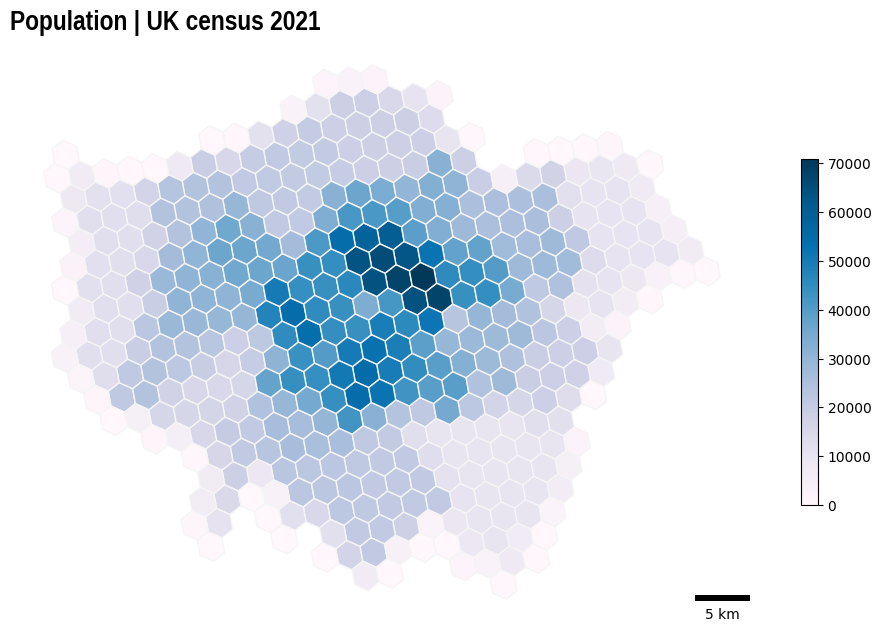

In [ ]:
#transform london to BNG
LDN_pop.to_crs("EPSG:27700", inplace = True)

# plot
fig, ax = plt.subplots(1,1, figsize=(12,9))

# scalebar
divider = make_axes_locatable(ax)
scalebar = ScaleBar(1, location='lower right', scale_loc='bottom', length_fraction=0.1)
ax.add_artist(scalebar)

#We can check that this has occured by plotting the results
LDN_pop.plot(ax=ax, column='population', edgecolor='whitesmoke', cmap = 'PuBu',legend=True, legend_kwds={'shrink': 0.5})
plt.axis('off')
plt.title("Population | UK census 2021", loc='left', size=20,**tfont)
plt.savefig(path + "images/population.png", bbox_inches = 'tight')